In [1]:
import random
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Align.Applications import ClustalwCommandline
#help(ClustalwCommandline)

### Q1)Construct ten "nt" random sequences each of size 20 and saved in fasta file format.

In [2]:
def generateSeq(length):
    lst = list(["A","T","G","C"])
    String = "".join(random.choice(lst) for i in range(length))
    return String

In [3]:
size=20
list_seq=[]
list_name=[]
for i in range(10):
    list_seq.append(generateSeq(size))
    list_name.append('seq'+str(i+1))

In [4]:
dict_s_n = dict(zip(list_seq , list_name))

ofile = open('my_sequences.fasta', "w")
for i in range(len(list_seq)):
    ofile.write(">" + list_name[i] + "\n" +list_seq[i] + "\n")
ofile.close()

In [5]:
for seq_record in SeqIO.parse('my_sequences.fasta', "fasta"):
    print(repr(seq_record.seq))

Seq('CGGCTGTCTACGTTGCAAGC', SingleLetterAlphabet())
Seq('GAGCGCCGACTACACCACCT', SingleLetterAlphabet())
Seq('TATTCCGGTTTGCCAATCTC', SingleLetterAlphabet())
Seq('TGCGCATTTGATTGGACTAA', SingleLetterAlphabet())
Seq('ATGACTGATTTAACCATGGG', SingleLetterAlphabet())
Seq('AGGAGTGACCCGATCATAGC', SingleLetterAlphabet())
Seq('AGGTACCAATGGTGGGCGCT', SingleLetterAlphabet())
Seq('CCCCACGGTCAATGTCCTGG', SingleLetterAlphabet())
Seq('GGATTCTGACACGCAAAATA', SingleLetterAlphabet())
Seq('GAGTAGTCTCATAACATCAG', SingleLetterAlphabet())


### Q2) Align these sequences using the program ClustalW

In [6]:
import os
from Bio.Align.Applications import ClustalwCommandline

#download exe from http://clustal.org/download/current/
clustalw_exe = "clustalw-2.1-linux-x86_64-libcppstatic/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile='my_sequences.fasta')
print(clustalw_cline)

clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 -infile=my_sequences.fasta


In [7]:
import os
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [8]:
from Bio import AlignIO
align = AlignIO.read("my_sequences.aln", "clustal")
print(align)

SingleLetterAlphabet() alignment with 10 rows and 27 columns
--CGGCTGTCTACGTTGCAAGC----- seq1
---GAGCGCCGACTACACCACCT---- seq2
------TATT-CCGGTTTGCCAATCTC seq3
-------ATGACTGATTTAACCATGGG seq5
---AGGTACCAATGGTGGGCGCT---- seq7
TGCGCA-TTTGATTGGACTAA------ seq4
-GAGTAGTCTCATAACATCAG------ seq10
-------CCCCACGGTCAATGTCCTGG seq8
---GGATTCTGACACGCAAAATA---- seq9
--AGGAGTGACCCGATCATAGC----- seq6


## Q3) Construct a Phylogenetic tree (newwick format) using the clustalW outcome

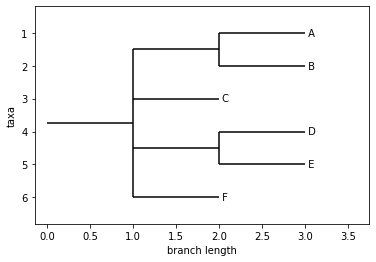

In [1]:
from Bio import Phylo
tree = Phylo.read("a12.dnd", "newick")
tree.rooted=True
Phylo.draw(tree)